##Importing Libraries


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##Reading the CSV file

In [ ]:
weather = pd.read_csv("weather_imp.csv", index_col="YEAR")

In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

MO             0.0
DY             0.0
T2M            0.0
PRECTOTCORR    0.0
PS             0.0
WS10M_MAX      0.0
WS50M_MAX      0.0
WD50M          0.0
TS             0.0
T2M_MAX        0.0
dtype: float64

In [ ]:
valid_columns = weather.columns[null_pct < .05]
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()

In [ ]:
weather.tail()

NameError: name 'weather' is not defined

In [ ]:
weather.dtypes

mo               int64
dy               int64
t2m            float64
prectotcorr    float64
ps             float64
ws10m_max      float64
ws50m_max      float64
wd50m          float64
ts             float64
t2m_max        float64
dtype: object

In [ ]:
weather.index

Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       ...
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
      dtype='int64', name='YEAR', length=9222)

In [ ]:
weather["target1"] = weather.shift(-1)["t2m_max"]

In [ ]:
darsh = weather['mo']

##MODEL TRAINING


In [ ]:
X = weather.iloc[:, :-1].values
y = weather.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
231/231 [==============================] - 3s 3ms/step - loss: 222.4130
Epoch 2/100
231/231 [==============================] - 1s 3ms/step - loss: 11.3045
Epoch 3/100
231/231 [==============================] - 1s 3ms/step - loss: 6.5044
Epoch 4/100
231/231 [==============================] - 1s 3ms/step - loss: 4.3312
Epoch 5/100
231/231 [==============================] - 1s 4ms/step - loss: 3.1805
Epoch 6/100
231/231 [==============================] - 1s 4ms/step - loss: 2.6573
Epoch 7/100
231/231 [==============================] - 1s 4ms/step - loss: 2.2790
Epoch 8/100
231/231 [==============================] - 1s 3ms/step - loss: 2.1065
Epoch 9/100
231/231 [==============================] - 1s 3ms/step - loss: 2.0219
Epoch 10/100
231/231 [==============================] - 1s 3ms/step - loss: 1.9003
Epoch 11/100
231/231 [==============================] - 1s 3ms/step - loss: 1.8497
Epoch 12/100
231/231 [==============================] - 1s 3ms/step - loss: 1.8081
Epoch 13/1

In [ ]:

ds = pd.read_csv('new_data.csv')
appended_data = pd.concat([weather, ds], ignore_index=True)

In [ ]:
appended_data.tail()

,mo,dy,t2m,prectotcorr,ps,ws10m_max,ws50m_max,wd50m,ts,t2m_max,target1
9222,4,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9223,4,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9224,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9225,4,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9226,4,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculated Mean

In [ ]:
def impute(df2, col_name):
    while df2[col_name].isna().any().any():
        first_na = df2[col_name].isna().diff() & df2[col_name].isna()

        imputed = df2.rolling(15, min_periods=1).mean().shift()[col_name]

        df2.loc[first_na, col_name] = imputed


In [ ]:
for i in range(2, 10):
  t2m = appended_data.columns[i]
  impute(appended_data, t2m)


appended_data["target1"] = appended_data.shift(-1)["t2m_max"]

In [ ]:
appended_data

,mo,dy,t2m,prectotcorr,ps,ws10m_max,ws50m_max,wd50m,ts,t2m_max,target1
0,1,1,19.010000,6.980000,97.020000,4.970000,7.240000,61.750000,19.690000,23.650000,23.720000
1,1,2,18.150000,4.500000,97.050000,5.240000,7.900000,64.500000,18.730000,23.720000,26.000000
2,1,3,19.180000,0.220000,97.070000,5.190000,8.090000,66.810000,20.120000,26.000000,27.440000
3,1,4,19.670000,0.080000,96.870000,5.460000,8.830000,75.310000,20.550000,27.440000,29.340000
4,1,5,21.070000,0.000000,96.650000,5.260000,8.060000,119.750000,21.650000,29.340000,28.540000
...,...,...,...,...,...,...,...,...,...,...,...
9222,4,22,29.687333,0.241333,96.358000,4.482667,6.808000,230.563333,31.224000,38.476000,38.503733
9223,4,23,29.673156,0.257422,96.356533,4.562178,6.901867,227.308889,31.195600,38.503733,38.587316
9224,4,24,29.664033,0.257250,96.354969,4.614323,6.943324,224.488148,31.190640,38.587316,38.747137
9225,4,25,29.710301,0.199067,96.349967,4.747944,7.136213,227.208025,31.228683,38.747137,38.867612


In [ ]:
appended_data.apply(lambda x: round(x, 2))

,mo,dy,t2m,prectotcorr,ps,ws10m_max,ws50m_max,wd50m,ts,t2m_max,target1
0,1,1,19.01,6.98,97.02,4.97,7.24,61.75,19.69,23.65,23.72
1,1,2,18.15,4.50,97.05,5.24,7.90,64.50,18.73,23.72,26.00
2,1,3,19.18,0.22,97.07,5.19,8.09,66.81,20.12,26.00,27.44
3,1,4,19.67,0.08,96.87,5.46,8.83,75.31,20.55,27.44,29.34
4,1,5,21.07,0.00,96.65,5.26,8.06,119.75,21.65,29.34,28.54
...,...,...,...,...,...,...,...,...,...,...,...
9222,4,22,29.69,0.24,96.36,4.48,6.81,230.56,31.22,38.48,38.50
9223,4,23,29.67,0.26,96.36,4.56,6.90,227.31,31.20,38.50,38.59
9224,4,24,29.66,0.26,96.35,4.61,6.94,224.49,31.19,38.59,38.75
9225,4,25,29.71,0.20,96.35,4.75,7.14,227.21,31.23,38.75,38.87


##Prediction of Temperature

In [ ]:
f_temp = (sc.transform([[4, 22, 29.69, 0.24, 96.36, 4.48, 6.81, 230.56, 31.22, 38],[ 4,	23,	29.67,	0.26,	96.36,	4.56,	6.90,	227.31,	31.20	,38.50	],[4,	24,	29.66,	0.26,	96.35,	4.61,	6.94,	224.49,	31.19,	38.59],[4,	25,	29.71, 0.20,	96.35,	4.75,	7.14	,227.21,	31.23,	38.75],[4,	26,	29.73,	0.17,	96.35,	4.93,	7.46,	228.18,	31.24,	38.87	]]))
y_pred = ann.predict(f_temp)
print(y_pred)


1/1 [==============================] - 0s 44ms/step
[[39.39408 ]
 [39.84117 ]
 [39.93634 ]
 [40.027016]
 [40.023018]]


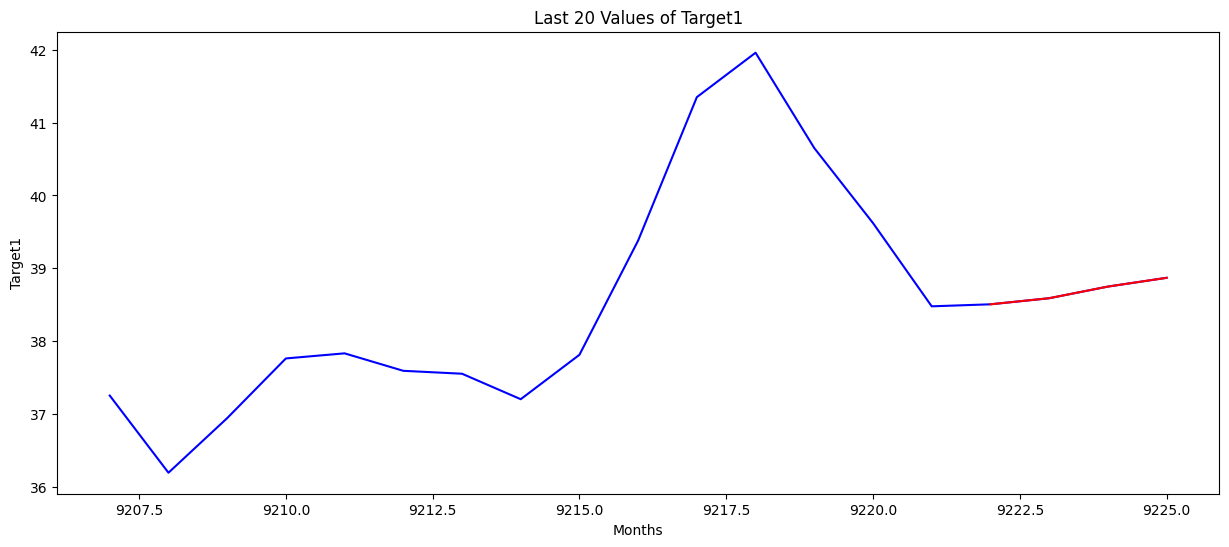

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(appended_data["target1"][-20:], color="blue")
plt.plot(appended_data["target1"][-5:], color="red")
plt.xlabel("Months")
plt.ylabel("Target1")
plt.title("Last 20 Values of Target1")
plt.show()
